## Sentiment Analysis Preprocessing: Data Preparation for LSTMs

### 1. Data Loading and Exploration 

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data into pandas a dataframe

imdb = pd.read_csv("subset10000_IMDB_Dataset.csv", encoding="utf-8")
imdb["sentiment"].unique()

array(['negative', 'positive'], dtype=object)

In [3]:
# Represent the sentiments in a meaningful numerical form
imdb["sentiment"] = imdb["sentiment"].replace({'positive': 1, 'negative': 0})
imdb["sentiment"].unique()

/var/folders/8d/b9gzcd5x54q7cjqvm_z_f3cw0000gn/T/ipykernel_18475/485016430.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  imdb["sentiment"] = imdb["sentiment"].replace({'positive': 1, 'negative': 0})


array([0, 1])

In [4]:
# Check the first few rows
imdb.head()

,review,sentiment
0,"Starts really well, nice intro and build up fo...",0
1,"Terrific movie: If you did not watch yet, you ...",1
2,I've seen hundreds of silent movies. Some will...,1
3,i had been looking for this film for so long b...,1
4,"Good: Engaging cinematic firefights, great pre...",1


In [5]:
## Explore the dataset (e.g., size, features, target variables, summary statistics).
## Check for any missing values and handle them if necessary.
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10000 non-null  object
 1   sentiment  10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


### 2. Preprocessing the Data 

In [6]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

print("NLTK Data Search Paths:", nltk.data.path)

NLTK Data Search Paths: ['/Users/mertozdemir/nltk_data', '/Library/Frameworks/Python.framework/Versions/3.12/nltk_data', '/Library/Frameworks/Python.framework/Versions/3.12/share/nltk_data', '/Library/Frameworks/Python.framework/Versions/3.12/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/mertozdemir/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mertozdemir/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mertozdemir/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
# An example function for prepocess the texts and create the tokens, you can improve it to clean the texts more accurately
import re

def prepocess_text(text):
    # Remove HTML tags
    text_clean = re.sub(r'<.*?>', ' ', text)

    # Convert to lowercase
    text_clean = text_clean.lower()

    # Replace slashes or other separators with spaces
    text_clean = re.sub(r'[\/\|\-,:]', ' ', text_clean)

    # Make each space sequence one space
    text_clean = re.sub(r'\s+', ' ', text_clean).strip()

    # Remove special characters except spaces
    text_clean = re.sub(r'[^A-Za-z0-9 ]', '', text_clean)

    # Tokenize
    tokens = word_tokenize(text_clean)

    # Remove stop words and lemmatize
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    processed_tokens = []
    for token in tokens:
        if token not in stop_words:
            processed_tokens.append(lemmatizer.lemmatize(token))
    
    tokens = processed_tokens

    return tokens

In [8]:
prepocess_text(imdb.iloc[0]["review"])

['start',
 'really',
 'well',
 'nice',
 'intro',
 'build',
 'main',
 'character',
 '5',
 'minute',
 'charm',
 'lost',
 'character',
 'mould',
 'main',
 'protagonist',
 'american',
 'pie',
 'loser',
 'without',
 'supporting',
 'cast',
 'innovative',
 'storyline',
 'made',
 'pie',
 'movie',
 'commercial',
 'success',
 'let',
 'honest',
 'heders',
 'acting',
 'pretty',
 'poor',
 'keaton',
 'daniel',
 'faris',
 'best',
 'substantial',
 'plot',
 'script',
 'get',
 'teeth',
 'movie',
 'plod',
 'without',
 'pace',
 'clear',
 'logical',
 'storyline',
 'justifying',
 'length',
 'ending',
 'predictable',
 'come',
 'predictable',
 'ive',
 'ticked',
 'spoiler',
 'box',
 'one',
 'line',
 'advice',
 'avoid',
 'cost',
 'unless',
 'really',
 'really',
 'nothing',
 'else',
 'listen',
 'watch',
 'even',
 'youll',
 'feel',
 'producer',
 'cheated',
 'hour',
 'half',
 'life']

In [9]:
# Add a tokens column to the dataframe to store preprocessed tokens
imdb['tokens'] = imdb['review'].apply(prepocess_text)

imdb.head()

,review,sentiment,tokens
0,"Starts really well, nice intro and build up fo...",0,"[start, really, well, nice, intro, build, main..."
1,"Terrific movie: If you did not watch yet, you ...",1,"[terrific, movie, watch, yet, must, watch, gee..."
2,I've seen hundreds of silent movies. Some will...,1,"[ive, seen, hundred, silent, movie, always, cl..."
3,i had been looking for this film for so long b...,1,"[looking, film, long, found, seen, younger, lo..."
4,"Good: Engaging cinematic firefights, great pre...",1,"[good, engaging, cinematic, firefights, great,..."


In [10]:
# Build the vocabulary using the tokens
# Assign indices to each token in the vocabulary
# Reserve 0 for padding

all_tokens = [token for row in imdb['tokens'] for token in row]
unique_tokens = sorted(set(all_tokens))

vocabulary = {token: idx + 2 for idx, token in enumerate(unique_tokens)}  # Start indexing at 2
vocabulary['<PAD>'] = 0  # Reserve 0 for padding
vocabulary['<UNK>'] = 1  # Reserve 1 for unknown tokens

print(len(vocabulary))

52921


In [11]:
# Calculate the length of each review from the tokenized version

imdb["token_len"] = imdb["tokens"].apply(len)

imdb.head()

,review,sentiment,tokens,token_len
0,"Starts really well, nice intro and build up fo...",0,"[start, really, well, nice, intro, build, main...",81
1,"Terrific movie: If you did not watch yet, you ...",1,"[terrific, movie, watch, yet, must, watch, gee...",27
2,I've seen hundreds of silent movies. Some will...,1,"[ive, seen, hundred, silent, movie, always, cl...",64
3,i had been looking for this film for so long b...,1,"[looking, film, long, found, seen, younger, lo...",77
4,"Good: Engaging cinematic firefights, great pre...",1,"[good, engaging, cinematic, firefights, great,...",94


In [12]:
# Display statistical details about review lengths

print(imdb["token_len"].describe())
print()
print(imdb['token_len'].quantile([0.8, 0.85, 0.9, 0.95]))

count    10000.000000
mean       121.550000
std         91.769776
min          4.000000
25%         65.000000
50%         90.000000
75%        149.000000
max        830.000000
Name: token_len, dtype: float64

0.80    170.0
0.85    197.0
0.90    238.0
0.95    314.0
Name: token_len, dtype: float64


In [ ]:
# Decide padding length considering these stats

padding_len = 175

Padding lenght is selected as 175. This way 80-85% of the sequences will be covered fully and, for more than half of the sequences, there won't be padded zeros more than tokens.

In [14]:
# Convert review tokens to indices and add an indices column to the dataframe to store
# Represent each token in the dataset with its corresponding index from the vocabulary

imdb["tokens_as_indices"] = imdb["tokens"].apply(lambda lst: [vocabulary.get(token) for token in lst])

imdb.head()

,review,sentiment,tokens,token_len,tokens_as_indices
0,"Starts really well, nice intro and build up fo...",0,"[start, really, well, nice, intro, build, main...",81,"[44563, 38171, 51295, 32404, 24335, 6909, 2874..."
1,"Terrific movie: If you did not watch yet, you ...",1,"[terrific, movie, watch, yet, must, watch, gee...",27,"[46783, 31366, 51038, 52516, 31751, 51038, 192..."
2,I've seen hundreds of silent movies. Some will...,1,"[ive, seen, hundred, silent, movie, always, cl...",64,"[24714, 41559, 22843, 42683, 31366, 2143, 9031..."
3,i had been looking for this film for so long b...,1,"[looking, film, long, found, seen, younger, lo...",77,"[28018, 17475, 27975, 18343, 41559, 52594, 281..."
4,"Good: Engaging cinematic firefights, great pre...",1,"[good, engaging, cinematic, firefights, great,...",94,"[20004, 15530, 8883, 17663, 20332, 36608, 5015..."


In [15]:
# Ensure all sequences have the same length by padding shorter sequences with zeros
# Pad the token indices version of review sequences
# Add an padded_indices column to store padded sequences

# with prepadding
def pad_sequence(seq, max_len):
    return [0] * (max_len - len(seq)) + seq if len(seq) < max_len else seq[:max_len]

imdb['padded_indices'] = imdb['tokens_as_indices'].apply(lambda x: pad_sequence(x, padding_len))

# Check if all lists in "padded_indices" are the same length
consistent_length = imdb['padded_indices'].apply(len).nunique() == 1

if consistent_length:
    print("All lists in 'padded_indices' are the same length.")
else:
    print("Lists in 'padded_indices' have varying lengths.")

All lists in 'padded_indices' are the same length.


### 3. Visualzing Word Vectors

In [16]:
# Load the FastText word vectors
import gensim.downloader as api
fasttext_vectors = api.load("fasttext-wiki-news-subwords-300")
print("FastText model loaded.")

FastText model loaded.


In [ ]:
# Check out for Out-of-Vocaublary (OOV) words
# See how many words in your created vocaublary are not presented in fasttext-vectors

word_names = list(fasttext_vectors.key_to_index.keys())  
oov_count = 0  
oov_words = []
vocabulary_words = vocabulary.keys()
for vocab_word in vocabulary_words:
    if (vocab_word not in word_names):
        oov_count += 1
        oov_words.append(vocab_word)

print(oov_words)
oov_count

['000wtf', '007s', '00o', '0and', '10000000000000', '1010i', '10did', '10dir', '10easy', '10jd', '10just', '10makes', '10minutesall', '10now', '10ps', '10they', '10this', '110min', '13thversions', '142cuz', '1433421', '1500b', '15as', '16me', '180d', '1896jeff', '1930sthe', '1932s', '1934s', '1935s', '1937s', '1939s', '1940sbut', '1946is', '1947i', '1947s', '1949s', '1950sprinceton', '1950stewart', '1953s', '1958and', '1958stands', '1961about', '1961s', '1962s', '1963s', '1964s', '1965s', '1967s', '1968s', '1970i', '1972s', '1974and', '1975s', '1979is', '1979it', '1979s', '1980if', '1980to', '1980which', '1982s', '1983s', '1984ish', '1985that', '1988for', '1988s', '1992s', '1995s', '1997s', '1998s', '1from', '1h40', '1h53', '1monsoon', '1several', '1stanley', '1this', '2001and', '2001s', '2003s', '2004s', '2005to', '2006and', '2006stay', '2007two', '2009nazarin', '20gs', '20ies', '20mn', '20sho', '22h45', '230mph', '23867', '25out', '2737487html', '27can', '2dont', '2god', '2graders', 

17387

OOV words' vector embeddings won't be created, hence, they will not evaluated in the model. If those words contain meaningful value to the model, it'd effect results badly. Typos and "slangish" words can make that happen.

In [18]:
# Visualize word vectors to understand how they work.
# Start by choosing a manageable number of words from the vocabulary, ideally 100–500.
# Focus on words that are frequent in the dataset or relevant to the task,
# Such as sentiment-rich terms like "good," "bad," "amazing," or "terrible."

# finding top 300 frequent words from a sample
freq_vocabulary = {}
for word in vocabulary:
    if word not in oov_words:
        count = 0
        for i in range(300):
            count += imdb.iloc[i]["review"].count(word)
        
        if (len(word) > 2):
            freq_vocabulary[word] = count

In [19]:
top_words = sorted(freq_vocabulary, key=freq_vocabulary.get, reverse=True)[:100]
top_words

['ing',
 'hat',
 'tha',
 'ter',
 'vie',
 'ilm',
 'fil',
 'film',
 'eve',
 'ion',
 'rea',
 'act',
 'movie',
 'one',
 'wit',
 'out',
 'tin',
 'tion',
 'ave',
 'ting',
 'ill',
 'here',
 'com',
 'ate',
 'tor',
 'ally',
 'man',
 'thin',
 'hav',
 'est',
 'ore',
 'art',
 'ect',
 'ugh',
 'ted',
 'ive',
 'ear',
 'have',
 'see',
 'ever',
 'oth',
 'cha',
 'eat',
 'men',
 'een',
 'per',
 'har',
 'hou',
 'ous',
 'ood',
 'ike',
 'rom',
 'ant',
 'end',
 'con',
 'ist',
 'wor',
 'whe',
 'like',
 'hen',
 'thing',
 'who',
 'fro',
 'der',
 'kin',
 'sho',
 'hey',
 'tim',
 'pro',
 'can',
 'lin',
 'red',
 'tch',
 'mor',
 'use',
 'min',
 'get',
 'ste',
 'und',
 'han',
 'rou',
 'lea',
 'char',
 'ica',
 'ely',
 'ost',
 'jus',
 'pre',
 'ons',
 'time',
 'bout',
 'tho',
 'real',
 'ire',
 'rat',
 'rec',
 'tic',
 'acte',
 'rin',
 'son']

In [20]:
selected_words = ["film", "here", "movie", "see", "ever", "have", "eat", "man", "art", "end", "like", "who", "thing",
                  "red", "time", "real", "one", "bad", "amazing", "terrible", "great", "love", "awful", "horrible",
                  "okay", "average", "standard"]

In [21]:
# For the selected words, retrieve their corresponding vector representations from the the pre-trained Word2Vec model.
# Each word will have a dense vector of a fixed dimensionality (e.g., 300 for fasttext-wiki-news-subwords-300).

selected_vectors = []
for i in selected_words:
    selected_vectors.append(fasttext_vectors[i])

In [22]:
# Use Principal Component Analysis (PCA) to reduce the dimensionality of the word vectors from their original size (e.g., 300) to 2D or 3D.
# PCA simplifies the high-dimensional data while preserving as much variance as possible, making it easier to visualize

from sklearn.decomposition import PCA

pca2D = PCA(n_components=2)
reduced_vectors_2D = pca2D.fit_transform(selected_vectors)

pca3D = PCA(n_components=3)
reduced_vectors_3D = pca3D.fit_transform(selected_vectors)

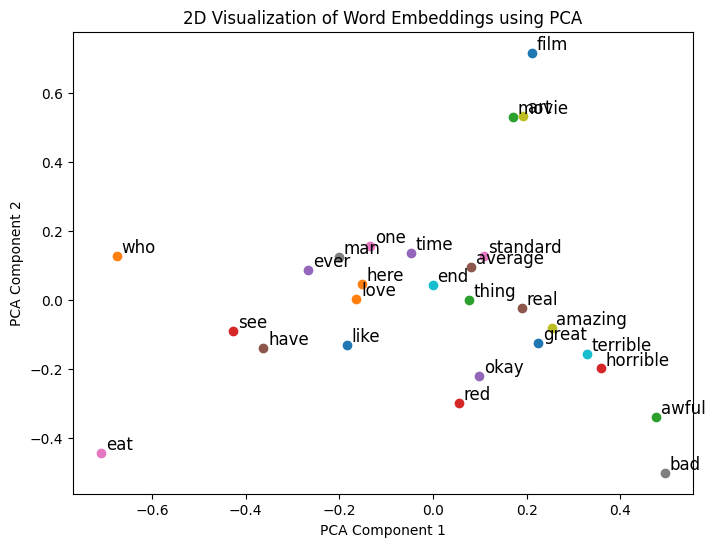

In [23]:
# For 2D visualization, create a scatter plot and annotate each point with its corresponding word to provide context.

plt.figure(figsize=(8, 6))
for i, word in enumerate(selected_words):
    x, y = reduced_vectors_2D[i]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word, fontsize=12)

plt.title("2D Visualization of Word Embeddings using PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

Key observations:

- film, movie, art cluster.
- who and eat are standing seperate from others and they're semantically different from others.
- amazing-great and terrible-horrible duos are close to each other and they both express similar things from opposite sides.

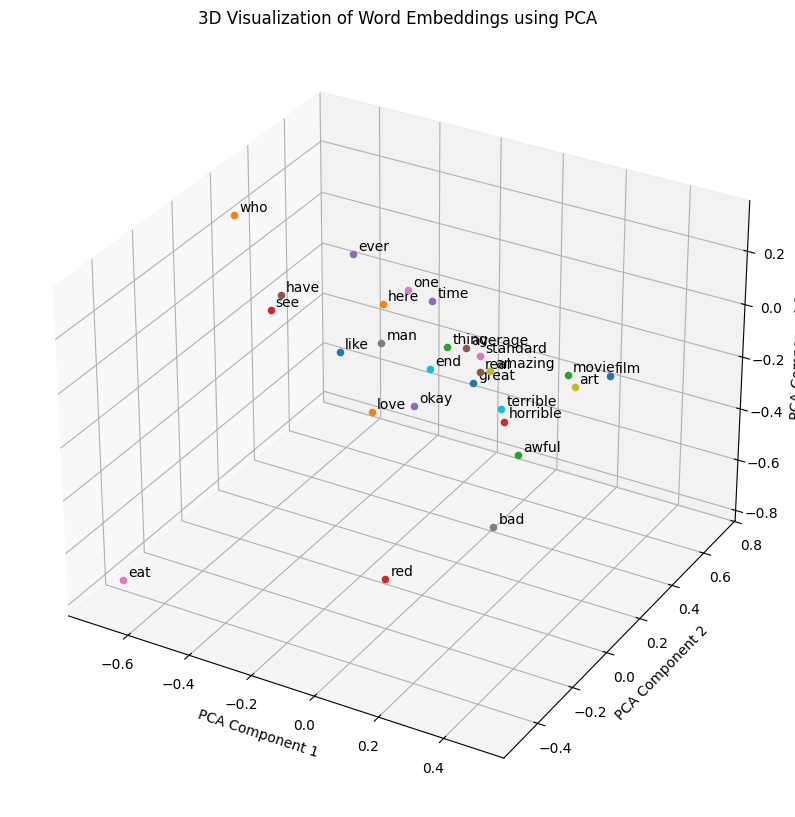

In [24]:
# For 3D visualization, use interactive plotting tools like matplotlib’s Axes3D to explore the spatial relationships between words dynamically.

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 11))
ax = fig.add_subplot(111, projection='3d')

for i, word in enumerate(selected_words):
    x, y, z = reduced_vectors_3D[i]
    ax.scatter(x, y, z)
    ax.text(x + 0.01, y + 0.01, z + 0.01, word, fontsize=10)

ax.set_title("3D Visualization of Word Embeddings using PCA")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
plt.show()

Key observations:

- eat and who still seems like outliers but new dimension seperated them from each other.

### 4. Creating the Emebdding Matrix

In [26]:
def create_embedding_matrix(word2vec, vocab, embedding_dim):
    # Initialize embedding matrix with random values
    embedding_matrix = np.random.uniform(-0.1, 0.1, (len(vocab), embedding_dim))
    
    # Assign pre-trained embeddings where available
    for word, idx in vocab.items():
        if word in word2vec:
            embedding_matrix[idx] = word2vec[word]
    
    embedding_matrix[vocab['<PAD>']] = np.zeros(embedding_dim)  # Zero vector for <PAD>
    
    return embedding_matrix


# Create a matrix where each row corresponds to the vector representation of a word in the vocabulary
# The embedding matrix will have dimensions [vocab_size, embedding_dim], where embedding_dim is the size of the word vectors

embedding_matrix_vocab = create_embedding_matrix(fasttext_vectors, vocabulary, 300)
print(embedding_matrix_vocab.shape)

(52921, 300)


In [ ]:
# Convert the embedding matrix to a PyTorch tensor
# Create the embedding layer in here or directly in the model
# Using PyTorch’s nn.Embedding.from_pretrained method you load the pre-trained embedding matrix into the embedding layer

import torch
import torch.nn as nn


embedding_tensor = torch.tensor(embedding_matrix_vocab, dtype=torch.float32)

embedding_layer = nn.Embedding.from_pretrained(embedding_tensor)

### 5. Implementing the IMDBDataset

In [28]:
# Train, validation and test split

from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

data = imdb["padded_indices"].to_numpy()
data = np.array(data.tolist(), dtype=np.int64)  # Convert object array to int64 array
labels = imdb["sentiment"].to_numpy()

train_data, temp_data, train_labels, temp_labels = train_test_split(
    data, labels, test_size=0.3, random_state=42  # 30% for validation + test
)
val_data, test_data, val_labels, test_labels = train_test_split(
    temp_data, temp_labels, test_size=1/3, random_state=42  # 20% validation, 10% test
)

In [29]:
# Implement the dataset class
# Combine the padded sequences and corresponding sentiment labels into a dataset structure compatible with PyTorch.
class IMDBDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = torch.tensor(sequences, dtype=torch.long)  # Convert sequences to tensor
        self.labels = torch.tensor(labels, dtype=torch.long)       # Convert labels to tensor

    def __len__(self):
        return len(self.sequences)  # Number of samples

    def __getitem__(self, idx):
        return self.sequences[idx], self.labels[idx]  


In [30]:
def tokenize_and_replace_oov(dataset, vocab):
    return [[vocab.get(token, vocab['<UNK>']) for token in seq] for seq in dataset]

train_data = tokenize_and_replace_oov(train_data, vocabulary)
val_data = tokenize_and_replace_oov(val_data, vocabulary)
test_data = tokenize_and_replace_oov(test_data, vocabulary)

In [31]:
# Create the train, validation and test dataLoaders

# Create dataset objects
train_dataset = IMDBDataset(train_data, train_labels)
val_dataset = IMDBDataset(val_data, val_labels)
test_dataset = IMDBDataset(test_data, test_labels)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


### 6. Implementing and Optimizing the Custom LSTM model

In [ ]:
# Manually implement the LSTM cell to understand its architecture and functionality.
# Implement forget, input, and output gates.
# Update the cell state and compute the hidden state for each time step.


import torch.nn.functional as F

import torch
import torch.nn as nn

class LSTMCell(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(LSTMCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        # Learnable weights for gates
        self.W_f = nn.Linear(input_size + hidden_size, hidden_size)  # Forget gate
        self.W_i = nn.Linear(input_size + hidden_size, hidden_size)  # Input gate
        self.W_c = nn.Linear(input_size + hidden_size, hidden_size)  # Cell state candidate
        self.W_o = nn.Linear(input_size + hidden_size, hidden_size)  # Output gate
        
    def forward(self, x, h_prev, c_prev):
        # Concatenate input and previous hidden state
        combined = torch.cat((x, h_prev), dim=1)
        
        # Forget gate
        f_t = torch.sigmoid(self.W_f(combined))
        
        # Input gate
        i_t = torch.sigmoid(self.W_i(combined))
        
        # Candidate cell state
        c_tilde = torch.tanh(self.W_c(combined))
        
        # Update cell state
        c_next = f_t * c_prev + i_t * c_tilde
        
        # Output gate
        o_t = torch.sigmoid(self.W_o(combined))
        
        # Compute next hidden state
        h_next = o_t * torch.tanh(c_next)
        
        return h_next, c_next


In [ ]:
# Build an LSTM layer by combining one or multiple LSTM cells to process a sequence.


import torch
import torch.nn as nn

class LSTMLayer(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=1):
        super(LSTMLayer, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        
        # Create LSTMCell for each layer
        self.cells = nn.ModuleList([LSTMCell(input_size if i == 0 else hidden_size, hidden_size) 
                                     for i in range(num_layers)])
    
    def forward(self, x, h0, c0):
        batch_size, seq_len, _ = x.size()
        outputs = []
        
        h_n = []
        c_n = []
        
        # Iterate over the sequence
        for t in range(seq_len):
            x_t = x[:, t, :]  # Extract the input for the current time step
            
            # Pass through all LSTM layers
            for layer in range(self.num_layers):
                h_prev = h0[layer]
                c_prev = c0[layer]
                
                # Forward pass through the LSTM cell
                h_next, c_next = self.cells[layer](x_t, h_prev, c_prev)
                
                # Update for next layer
                x_t = h_next
                
                # Store the hidden and cell states for the final time step
                if t == seq_len - 1:
                    h_n.append(h_next)
                    c_n.append(c_next)
            
            outputs.append(h_next.unsqueeze(1))  # Collect the output for the current time step
        
        # Stack outputs to form the final output sequence
        outputs = torch.cat(outputs, dim=1)  # Shape: (batch_size, seq_len, hidden_size)
        h_n = torch.stack(h_n, dim=0)  # Shape: (num_layers, batch_size, hidden_size)
        c_n = torch.stack(c_n, dim=0)  # Shape: (num_layers, batch_size, hidden_size)
        
        return outputs, h_n, c_n

In [ ]:
# Build an LSTM model. Integrate the embedding layer into the model architecture.


class SentimentLSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, output_size, num_layers=1, 
                 dropout=0.5, freeze_embeddings=False):
        super(SentimentLSTM, self).__init__()
        
        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        if freeze_embeddings:
            self.embedding.weight.requires_grad = False  # Freeze embeddings
        
        # LSTM layer
        self.lstm = LSTMLayer(embedding_dim, hidden_size, num_layers)
        
        # Dropout for regularization
        self.dropout = nn.Dropout(dropout)
        
        # Fully connected output layer
        self.fc = nn.Linear(hidden_size, output_size)
        
        # Activation (for binary classification, use sigmoid; for multi-class, use softmax)
        self.activation = nn.Sigmoid() if output_size == 1 else nn.Softmax(dim=1)
    
    def forward(self, x, h0, c0):
        # Embedding layer
        embedded = self.embedding(x)  # Shape: (batch_size, seq_len, embedding_dim)
        
        # LSTM layer
        lstm_out, h_n, c_n = self.lstm(embedded, h0, c0)  # Shape: (batch_size, seq_len, hidden_size)
        
        # Use the output of the last time step
        final_output = lstm_out[:, -1, :]  # Shape: (batch_size, hidden_size)
        
        # Dropout and fully connected layer
        final_output = self.dropout(final_output)
        logits = self.fc(final_output)  # Shape: (batch_size, output_size)
        
        # Apply activation function
        outputs = self.activation(logits)  # Shape: (batch_size, output_size)
        
        return outputs

In [61]:
# Hyperparameter values
input_size = embedding_matrix_vocab.shape[1]  # Word vector size (embedding dimension)
hidden_size = 128 
epochs = 10  
learning_rate = 0.1  
batch_size = 32  
num_layers = 2
dropout = 0.5
freeze_embeddings = False


In [ ]:
# Define appropriate loss function for binary classification.
# Choose an optimizer and set its parameters (e.g., learning rate).


# Initialize model
model = SentimentLSTM(embedding_matrix_vocab.shape[0], 300, hidden_size, 1, 
                      num_layers, dropout, freeze_embeddings).to("mps")

# Define loss function
criterion = nn.BCELoss()  # Use this if model output is sigmoid-activated

# Define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [67]:
import tqdm
def calculate_accuracy(outputs, labels):
    preds = (outputs > 0.5).float()  
    return (preds == labels).float().mean().item()


def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device):
    model = model.to(device)
    history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}
    best_val_loss = float('inf')
    best_model_path = 'best_model.pth'
    
    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        
        model.train()
        train_loss, train_correct = 0.0, 0.0
        for inputs, labels in tqdm(train_loader, desc="Training", leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            batch_size = inputs.size(0)
            
            h0 = torch.zeros(num_layers, batch_size, hidden_size).to(device)
            c0 = torch.zeros(num_layers, batch_size, hidden_size).to(device)
            
            outputs = model(inputs, h0, c0).squeeze()
            loss = criterion(outputs, labels.float())
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            train_correct += calculate_accuracy(outputs, labels) * inputs.size(0)
        
        train_loss /= len(train_loader)
        train_acc = train_correct / len(train_dataset)
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        
        # Validation phase
        model.eval()
        val_loss, val_correct = 0.0, 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                batch_size = inputs.size(0)
                
                h0 = torch.zeros(num_layers, batch_size, hidden_size).to(device)
                c0 = torch.zeros(num_layers, batch_size, hidden_size).to(device)
                
                outputs = model(inputs, h0, c0).squeeze()
                loss = criterion(outputs, labels.float())
                
                val_loss += loss.item()
                val_correct += calculate_accuracy(outputs, labels) * inputs.size(0)
        
        val_loss /= len(val_loader)
        val_acc = val_correct / len(val_dataset)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        
        # Save the best model
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), best_model_path)
            print(f"Best model saved at epoch {epoch + 1} with validation loss {val_loss:.4f}")
        
        print(f"Epoch {epoch + 1}/{num_epochs} - Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
    
    return history, best_model_path

history, best_model_path = train_model(model, train_loader, val_loader, criterion, optimizer, epochs, "mps")

Epoch 1/10


Best model saved at epoch 1 with validation loss 0.6945
Epoch 1/10 - Train Loss: 0.6934, Train Acc: 0.5093, Val Loss: 0.6945, Val Acc: 0.4835
Epoch 2/10


Best model saved at epoch 2 with validation loss 0.6938
Epoch 2/10 - Train Loss: 0.6933, Train Acc: 0.5056, Val Loss: 0.6938, Val Acc: 0.4835
Epoch 3/10


Epoch 3/10 - Train Loss: 0.6932, Train Acc: 0.5053, Val Loss: 0.6939, Val Acc: 0.4835
Epoch 4/10


Best model saved at epoch 4 with validation loss 0.6934
Epoch 4/10 - Train Loss: 0.6932, Train Acc: 0.5056, Val Loss: 0.6934, Val Acc: 0.4835
Epoch 5/10


Best model saved at epoch 5 with validation loss 0.6934
Epoch 5/10 - Train Loss: 0.6932, Train Acc: 0.5050, Val Loss: 0.6934, Val Acc: 0.4835
Epoch 6/10


Epoch 6/10 - Train Loss: 0.6932, Train Acc: 0.5056, Val Loss: 0.6936, Val Acc: 0.4835
Epoch 7/10


Epoch 7/10 - Train Loss: 0.6933, Train Acc: 0.4991, Val Loss: 0.6937, Val Acc: 0.4835
Epoch 8/10


Epoch 8/10 - Train Loss: 0.6932, Train Acc: 0.5056, Val Loss: 0.6936, Val Acc: 0.4835
Epoch 9/10


Best model saved at epoch 9 with validation loss 0.6934
Epoch 9/10 - Train Loss: 0.6932, Train Acc: 0.5056, Val Loss: 0.6934, Val Acc: 0.4835
Epoch 10/10


Epoch 10/10 - Train Loss: 0.6931, Train Acc: 0.5074, Val Loss: 0.6935, Val Acc: 0.4835


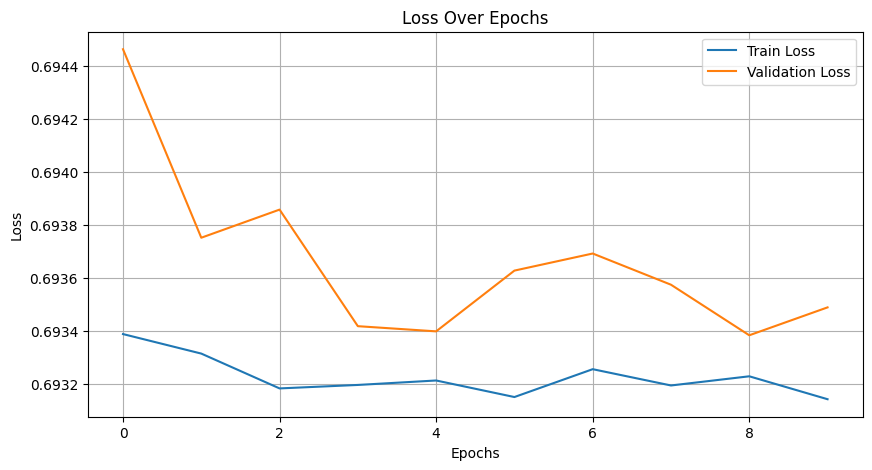

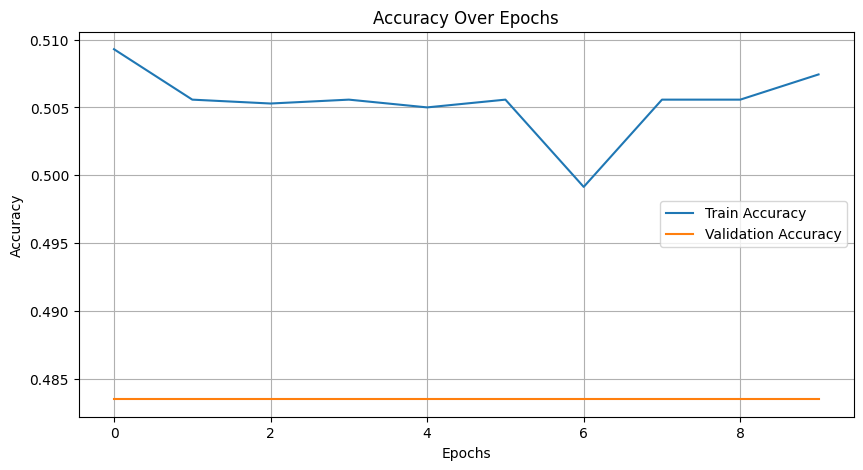

In [ ]:
# Visualize the accuracy and loss change of the best model across training and validation datasets
import matplotlib.pyplot as plt

def plot_metrics(history):
    # Plot loss
    plt.figure(figsize=(10, 5))
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(history['train_acc'], label='Train Accuracy')
    plt.plot(history['val_acc'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

# Plot metrics
plot_metrics(history)